In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/luxury-watches-price-dataset/Luxury watch.csv


In [2]:
# Let's import and inspect our dataset
luxury_watches_df = pd.read_csv("/kaggle/input/luxury-watches-price-dataset/Luxury watch.csv")
luxury_watches_df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,NaN,"2,800"


In [3]:
# - Let's see more information about our data
luxury_watches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


In [4]:
# - Let's check for duplicate rows in our data set

luxury_watches_df.duplicated().sum()

# - Drop the duplicate rows in our dataset

luxury_watches_df.drop_duplicates(inplace=True)

In [5]:
luxury_watches_df.duplicated().sum()

0

<AxesSubplot:>

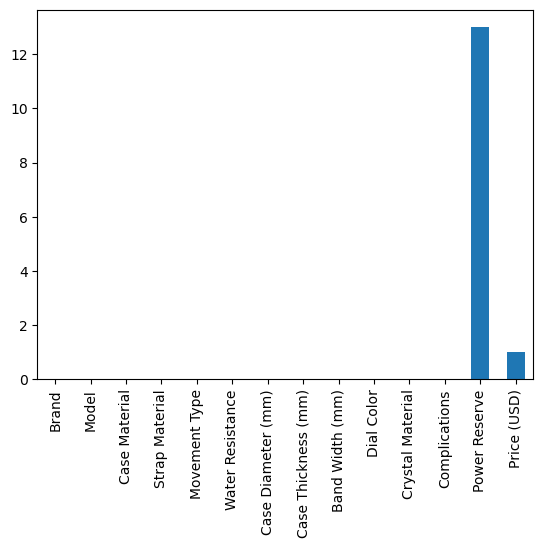

In [6]:
# - Let's plot a chart that displays the sum of missing values in our dataset
# - 
luxury_watches_df.isna().sum().plot(kind="bar")

In [7]:
# - Since the price value of the watches are important to our analysis, and just one row
# - is affected, we can drop this row as it might affect our anlysis

lw_df_cleaned = luxury_watches_df.dropna(subset=["Price (USD)"]);

lw_df_cleaned.describe()

,Case Diameter (mm),Case Thickness (mm),Band Width (mm)
count,487.000000,487.000000,487.000000
mean,41.040041,11.584784,21.109856
std,2.532395,2.492966,1.678583
min,27.500000,5.000000,15.000000
25%,40.000000,9.800000,20.000000
50%,41.000000,12.000000,20.000000
75%,42.000000,13.300000,22.000000
max,46.500000,17.500000,28.000000


Seeing the intital information from our dataset, we've noticed that the Price column is a String. We need the values of this column to be float so we'll be able to carry out summary statistics and analysis on the dataset. To do this, we can create another field in our dataset to accomodate the conversion of our Price values to float.

In [8]:
# - create a new column and insert the float conversion of the Price (USD) column
def convert_to_float(value):
    return float(value.replace(",",""))

lw_df_cleaned["Price_Conv (USD)"] = lw_df_cleaned["Price (USD)"].apply(convert_to_float)

## - describe the dataset again
lw_df_cleaned.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Price_Conv (USD)
count,487.000000,487.000000,487.000000,487.000000
mean,41.040041,11.584784,21.109856,12100.266940
std,2.532395,2.492966,1.678583,10462.319226
min,27.500000,5.000000,15.000000,495.000000
25%,40.000000,9.800000,20.000000,5500.000000
50%,41.000000,12.000000,20.000000,8400.000000
75%,42.000000,13.300000,22.000000,16400.000000
max,46.500000,17.500000,28.000000,70000.000000


In [9]:
# - Let's preview our data again
lw_df_cleaned.tail()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD),Price_Conv (USD)
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500",21500.0
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500",13500.0
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800",1800.0
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000",19000.0
506,Frederique Constant,Classics,Stainless Steel,Leather,Automatic,50 meters,40.0,10.60,20.0,Silver,Sapphire,Date,38 hours,"1,200",1200.0


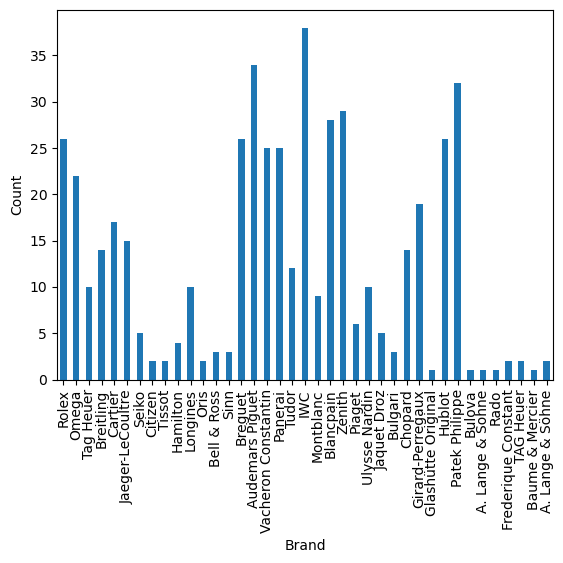

In [10]:
from matplotlib import pyplot as plt

# - let's summarize the watches in our dataset using a table and a chart
lw_df_cleaned.value_counts()

lw_df_cleaned['Brand'].value_counts(sort=False).plot(kind="bar")

plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

With everything in place now, we can start the analysis of our data. Looking at the dataset, here are things we may want to find out:
1. Summary of price for models of each brand to ascertain the most expensive watches
2. Popular dial colors used my these brands
3. Popular Case Materials used by brands
4. Most Frequent Complications for luxury watches
5. Most popular strap materials used by luxury brands
6. Average case diameter, thickness and band width for each brand
7. 
